# Loan Prediction Analysis

## Problem Statement:


## Importing Libraries

In [711]:
import pandas as pd                      # to read the files
import numpy as np                       # to create a multi-dimensional array
import matplotlib.pyplot as plt          # to plot
import seaborn as sns                    # to visualize
import warnings                          # to ignore the warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Import the Data Files

In [712]:
to_test = pd.read_csv('test.csv')
to_train = pd.read_csv('train.csv')

Test File

In [713]:
to_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [714]:
to_test.shape

(367, 12)

Training File

In [715]:
to_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [716]:
to_train.shape

(614, 13)

Creating a copy of the file so new changes will not affect the original dataset

In [717]:
testing_original = to_test.copy()
training_original = to_train.copy()

Checking the Data Types of Test Variables

In [718]:
to_test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Checking the Data Types of Train Variables

In [719]:
to_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Univariate Analysis

Examining each variable of the dataset individually

1. Target Variable i.e. "Loan Status"

In [720]:
to_train["Loan_Status"].value_counts()      # Counting the values of different Loan Status

Loan_Status
Y    422
N    192
Name: count, dtype: int64

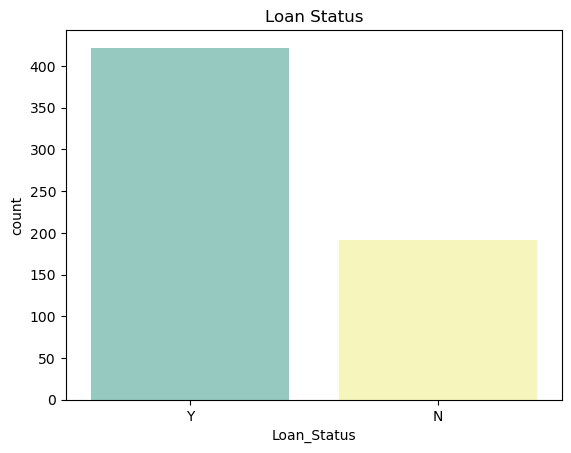

In [721]:
sns.countplot(x="Loan_Status", data=to_train, palette="Set3", order=to_train["Loan_Status"].value_counts().index, )
plt.title("Loan Status")
plt.show()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


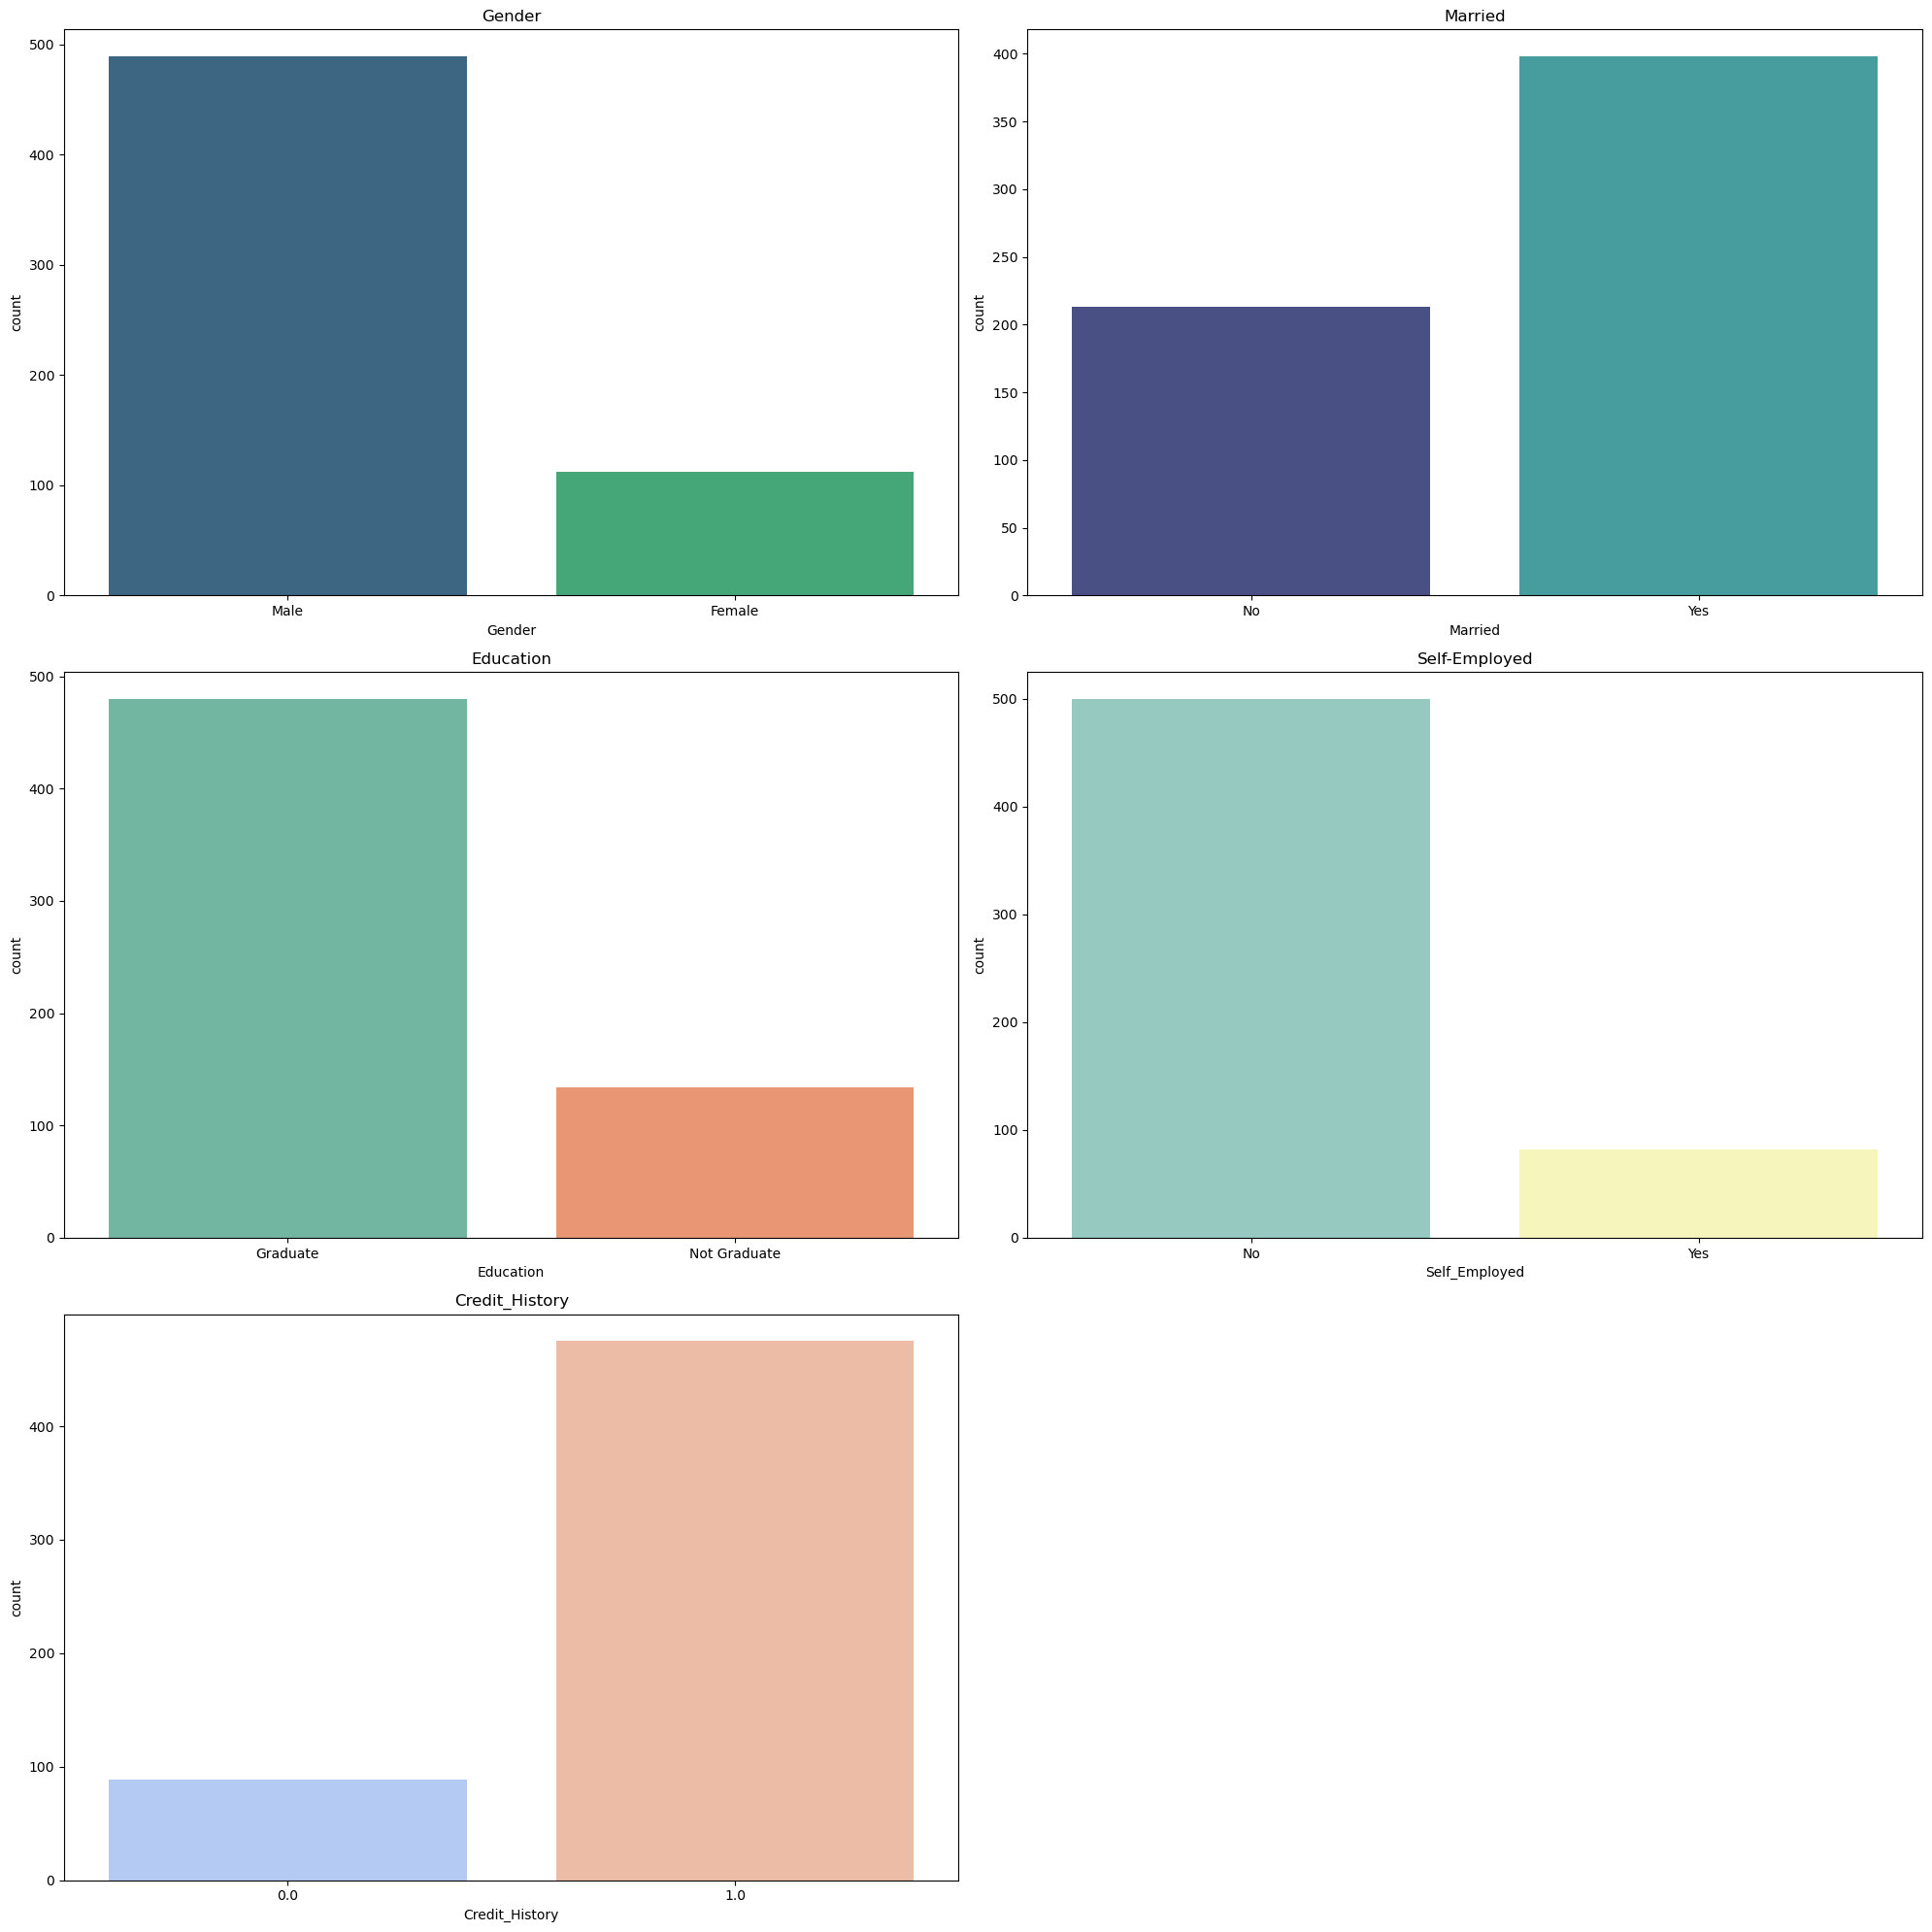

In [722]:
# Print the columns in the DataFrame
print(to_train.columns)

plt.figure(figsize=(20, 20))

# Subplot 1
plt.subplot(321)
sns.countplot(x="Gender", data=to_train, palette="viridis")
plt.title("Gender")

# Subplot 2
plt.subplot(322)
sns.countplot(x="Married", data=to_train, palette="mako")
plt.title("Married")

# Subplot 3
plt.subplot(323)
sns.countplot(x="Education", data=to_train, palette="Set2")
plt.title("Education")

# Subplot 4
plt.subplot(324)
sns.countplot(x="Self_Employed", data=to_train, palette="Set3")
plt.title("Self-Employed")

# Subplot 5
plt.subplot(325)
sns.countplot(x="Credit_History", data=to_train, palette="coolwarm")
plt.title("Credit_History")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

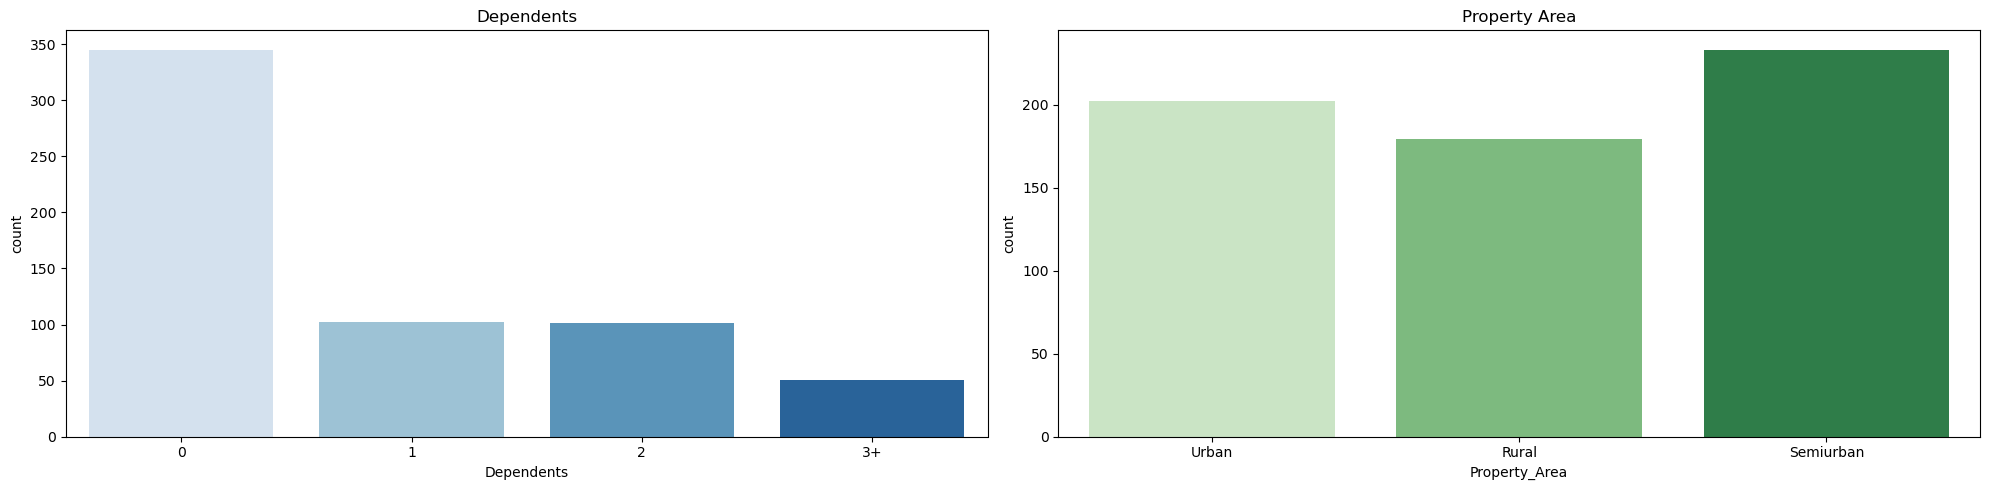

In [723]:
plt.figure(figsize=(20, 5))

# Subplot 1 for Dependents
plt.subplot(121)
sns.countplot(x="Dependents", data=to_train, palette="Blues")
plt.title("Dependents")

# Subplot 2 for Property Area
plt.subplot(122)
sns.countplot(x="Property_Area", data=to_train, palette="Greens")
plt.title("Property Area")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Plots for Independent Numerical Variables in the dataset

Applicant Income

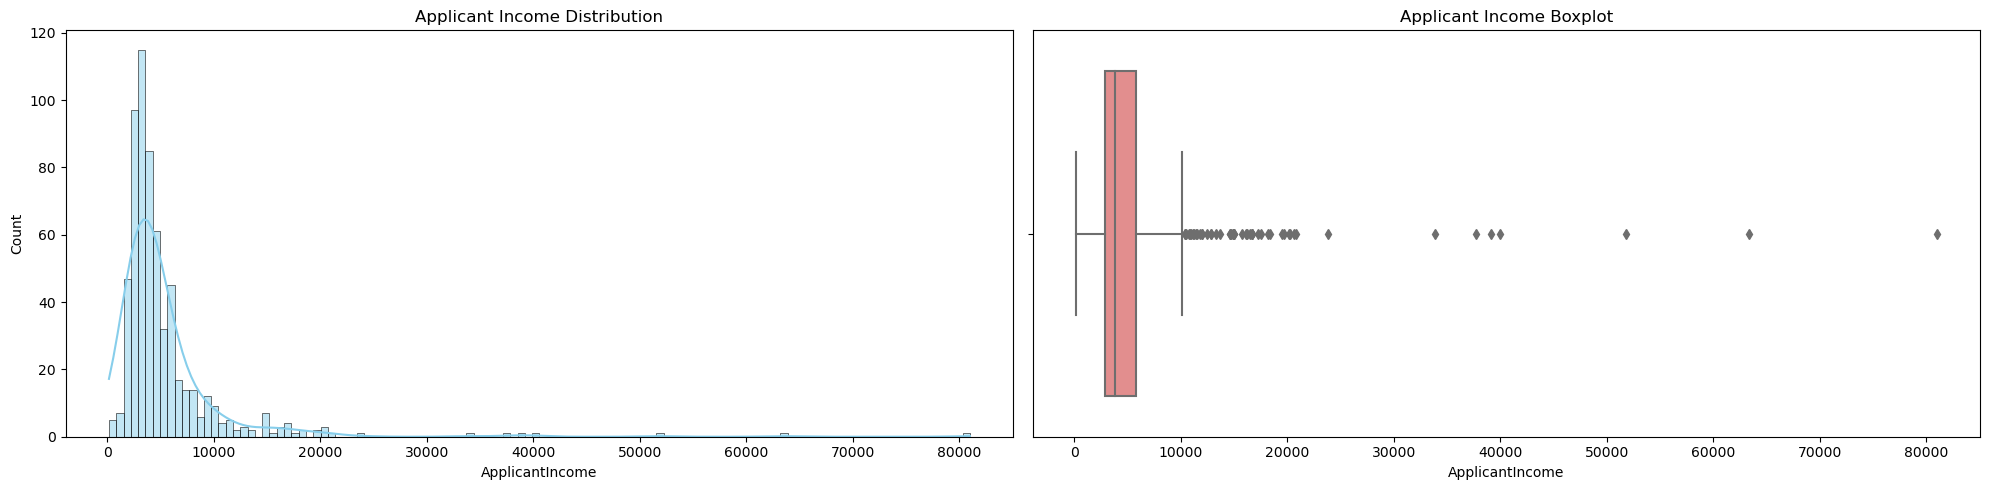

In [724]:
plt.figure(figsize=(20, 5))

# Subplot 1 for Applicant Income (Distribution plot)
plt.subplot(121)
sns.histplot(to_train["ApplicantIncome"], color="skyblue", kde=True)
plt.title("Applicant Income Distribution")
 
# Subplot 2 for Applicant Income (Box plot)
plt.subplot(122)
sns.boxplot(x=to_train["ApplicantIncome"], color="lightcoral")
plt.title("Applicant Income Boxplot")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


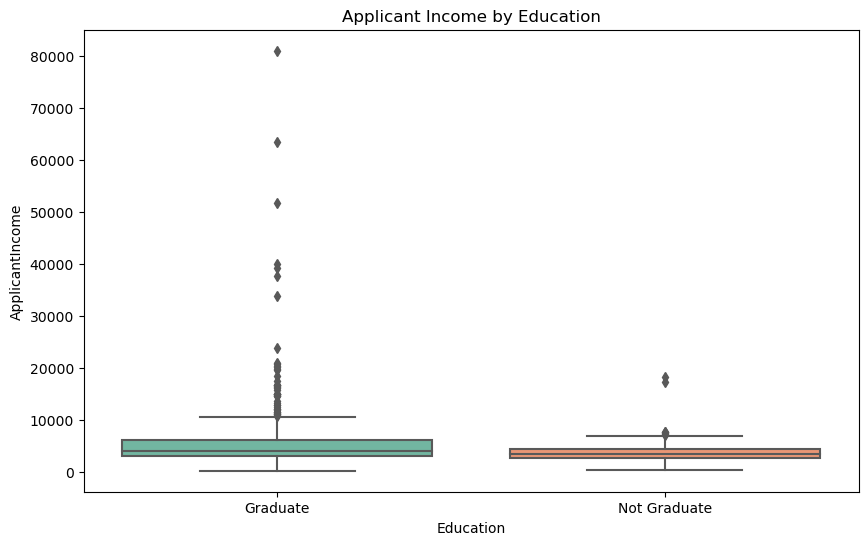

In [725]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Education", y="ApplicantIncome", data=to_train, palette="Set2")
plt.title("Applicant Income by Education")

plt.show()

Co Applicant Income

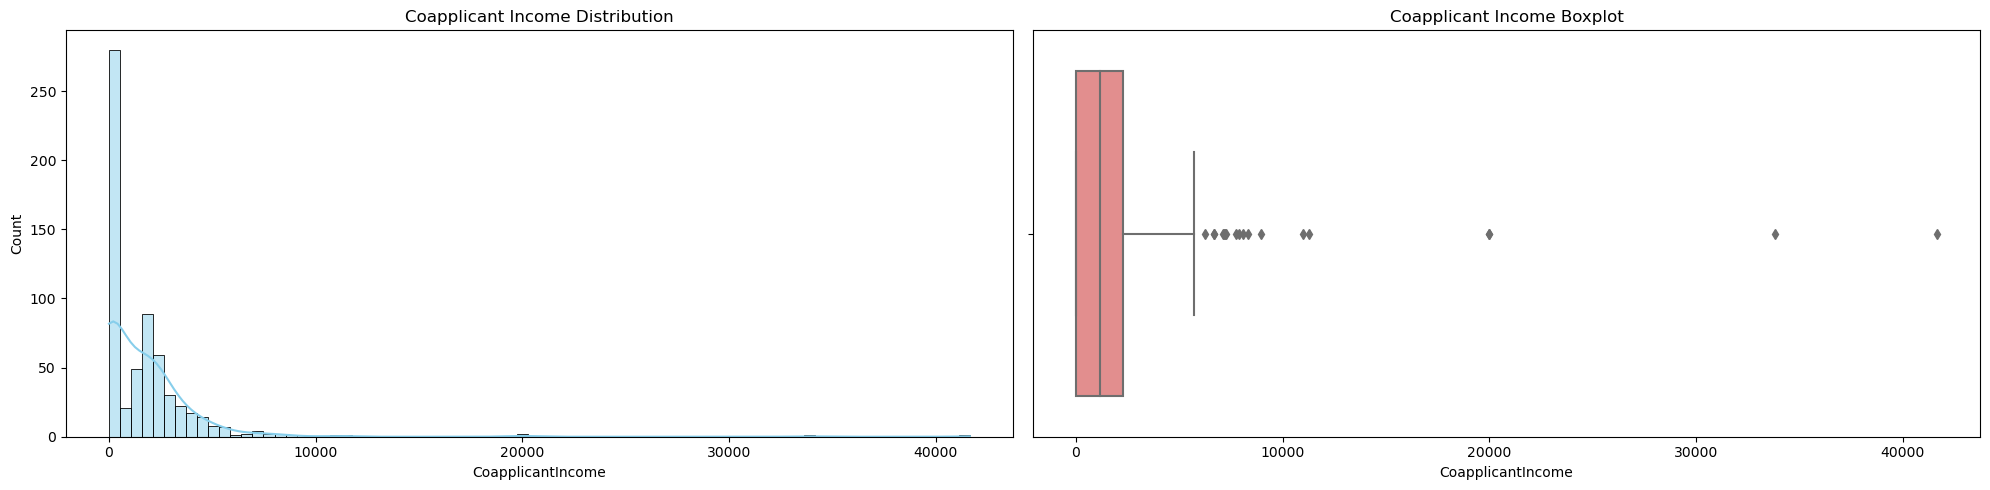

In [726]:
plt.figure(figsize=(20, 5))

# Subplot 1 for Coapplicant Income (Distribution)
plt.subplot(121)
sns.histplot(to_train["CoapplicantIncome"], color="skyblue", kde=True)
plt.title("Coapplicant Income Distribution")

# Subplot 2 for Coaaplicant Income (Boxplot)
plt.subplot(122)
sns.boxplot(x=to_train["CoapplicantIncome"], color="lightcoral")
plt.title("Coapplicant Income Boxplot")

plt.tight_layout()
plt.show()

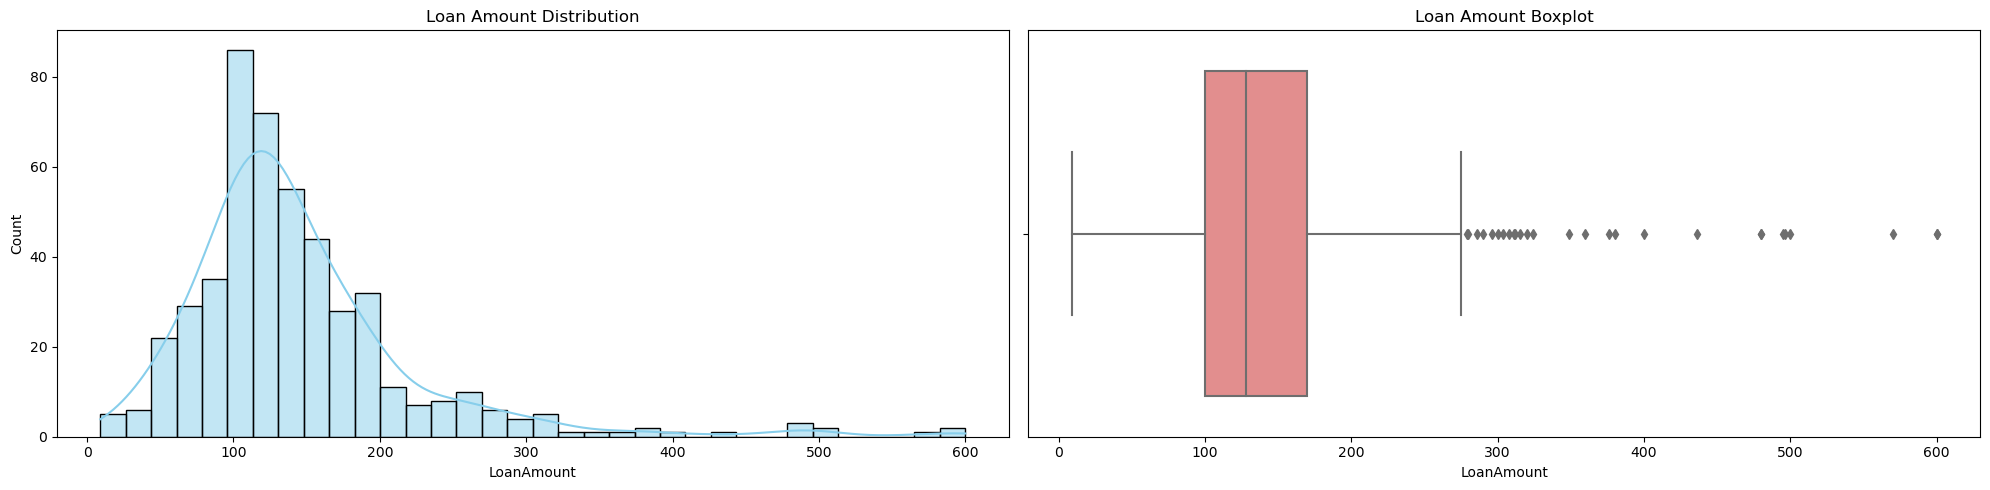

In [727]:
dataf = to_train.dropna()
plt.figure(figsize=(20, 5))

# Subplot 1 for Loan Amount (Distribution)
plt.subplot(121)
sns.histplot(dataf["LoanAmount"], color="skyblue", kde=True)
plt.title("Loan Amount Distribution")

# Subplot 2 for Loan Amount (Boxplot)
plt.subplot(122)
sns.boxplot(x=dataf["LoanAmount"], color="lightcoral")
plt.title("Loan Amount Boxplot")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Bivariate Analysis

Examining two variables at a time

Frequency Table for Gender and Loan Status

In [728]:
Gender = pd.crosstab(to_train["Gender"],to_train["Loan_Status"])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<Figure size 400x400 with 0 Axes>

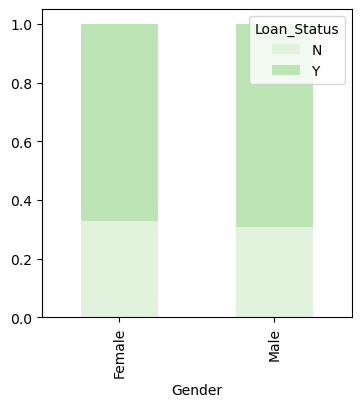

In [729]:
plt.figure(figsize=(4, 4))

# Normalize the counts to create stacked percentages
normalized_gender = Gender.div(Gender.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_gender.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette("Greens"))

plt.show()

Frequency Table for Married and Loan Status

In [730]:
Married=pd.crosstab(to_train["Married"],to_train["Loan_Status"])
Married

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


<Figure size 400x400 with 0 Axes>

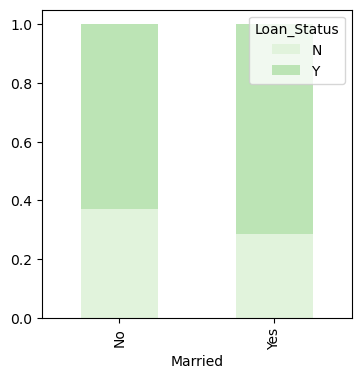

In [731]:
plt.figure(figsize=(4, 4))

# Normalize the counts to create stacked percentages
normalized_married = Married.div(Married.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_married.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette("Greens"))

plt.show()

Frequency Table for Dependents and Loan Status

In [732]:
Dependents=pd.crosstab(to_train["Dependents"],to_train["Loan_Status"])
Dependents

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


<Figure size 400x400 with 0 Axes>

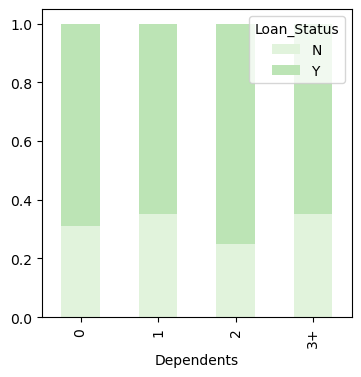

In [733]:
plt.figure(figsize=(4, 4))

# Normalize the counts to create stacked percentages
normalized_dependents = Dependents.div(Dependents.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_dependents.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette("Greens"))

plt.show()

Frequency Table for Education and Loan Status

In [734]:
Education=pd.crosstab(to_train["Education"],to_train["Loan_Status"])
Education

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


<Figure size 400x400 with 0 Axes>

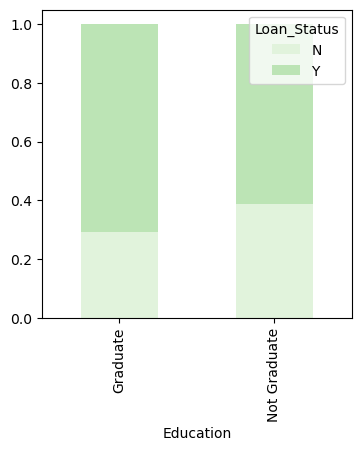

In [735]:
plt.figure(figsize=(4, 4))

# Normalize the counts to create stacked percentages
normalized_education = Education.div(Education.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_education.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette("Greens"))

plt.show()

Frequency Table for Self Employed and Loan Status

In [736]:
Self_Employed=pd.crosstab(to_train["Self_Employed"],to_train["Loan_Status"])
Self_Employed

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


<Figure size 400x400 with 0 Axes>

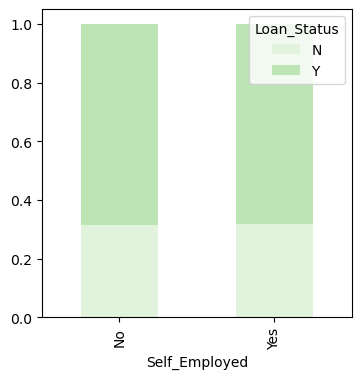

In [737]:
plt.figure(figsize=(4, 4))

# Normalize the counts to create stacked percentages
normalized_self_employed = Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_self_employed.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette("Greens"))

plt.show()

Frequency Table for Credit History and Loan Status

In [738]:
Credit_History=pd.crosstab(to_train["Credit_History"],to_train["Loan_Status"])
Credit_History

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<Figure size 400x400 with 0 Axes>

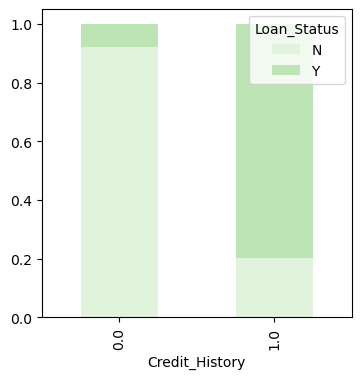

In [739]:
plt.figure(figsize=(4, 4))

# Normalize the counts to create stacked percentages
normalized_credit_history = Credit_History.div(Credit_History.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_credit_history.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette("Greens"))

plt.show()

Frequency Table for Propoerty Area and Loan Status

In [740]:
Property_Area=pd.crosstab(to_train["Property_Area"],to_train["Loan_Status"])
Property_Area

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


<Figure size 400x400 with 0 Axes>

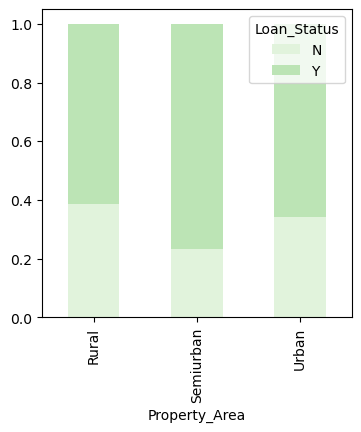

In [741]:
plt.figure(figsize=(4, 4))

# Normalize the counts to create stacked percentages
normalized_property_area = Property_Area.div(Property_Area.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_property_area.plot(kind="bar", stacked=True, figsize=(4, 4), color=sns.color_palette("Greens"))

plt.show()

Plotting Numerical Categorical Variable and Loan Status

In [742]:
bins=[0,2500,4000,6000,8100]
group=["Low","Average","High","Very high"]
to_train["Income_bin"]=pd.cut(to_train["ApplicantIncome"],bins,labels=group)

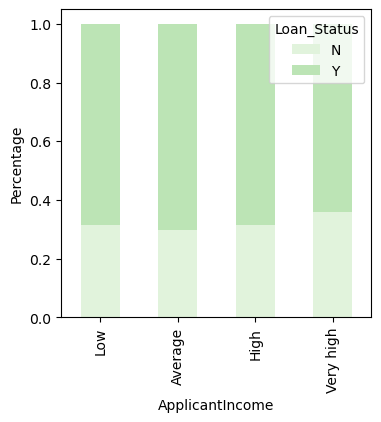

In [743]:
Income_bin = pd.crosstab(to_train['Income_bin'], to_train['Loan_Status'])

# Choose a color palette (e.g., "Set1" from seaborn)
color_palette = sns.color_palette("Set1")

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,figsize=(4, 4), color=sns.color_palette("Greens"))

plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

plt.show()
plt.show()

Doing the same for Coapplicant Income

<Figure size 800x600 with 0 Axes>

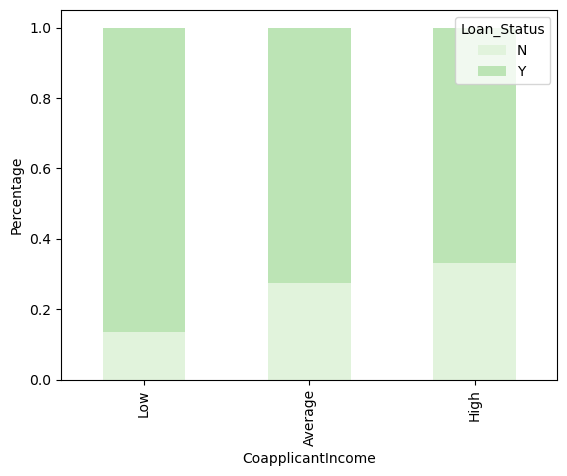

In [744]:
bins = [0, 1000, 3000, 42000]
group = ["Low", "Average", "High"]
to_train["Coapplicant_Income_bin"] = pd.cut(to_train["CoapplicantIncome"], bins, labels=group)

Coapplicant_Income_bin = pd.crosstab(to_train["Coapplicant_Income_bin"], to_train["Loan_Status"])

plt.figure(figsize=(8, 6))

# Normalize the counts to create stacked percentages
normalized_coapplicant_income = Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_coapplicant_income.plot(kind="bar", stacked=True, color=sns.color_palette("Greens"))

plt.xlabel("CoapplicantIncome")
plt.ylabel("Percentage")
plt.show()

It shows that if coapplicant's Income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don't have any coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

<Figure size 800x600 with 0 Axes>

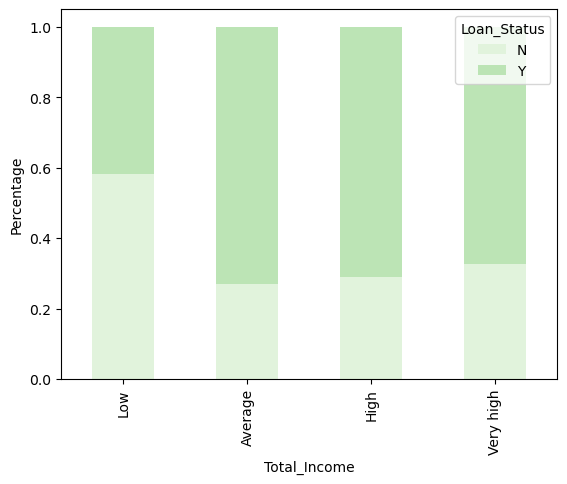

In [745]:
to_train["Total_Income"] = to_train["ApplicantIncome"] + to_train["CoapplicantIncome"]
bins = [0, 2500, 4000, 6000, 81000]
group = ["Low", "Average", "High", "Very high"]
to_train["Total_Income_bin"] = pd.cut(to_train["Total_Income"], bins, labels=group)

Total_Income_bin = pd.crosstab(to_train["Total_Income_bin"], to_train["Loan_Status"])

plt.figure(figsize=(8, 6))

# Normalize the counts to create stacked percentages
normalized_total_income = Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_total_income.plot(kind="bar", stacked=True, color=sns.color_palette("Greens"))

plt.xlabel("Total_Income")
plt.ylabel("Percentage")
plt.show()

Plotting Laon Amount and Loan Status

<Figure size 800x600 with 0 Axes>

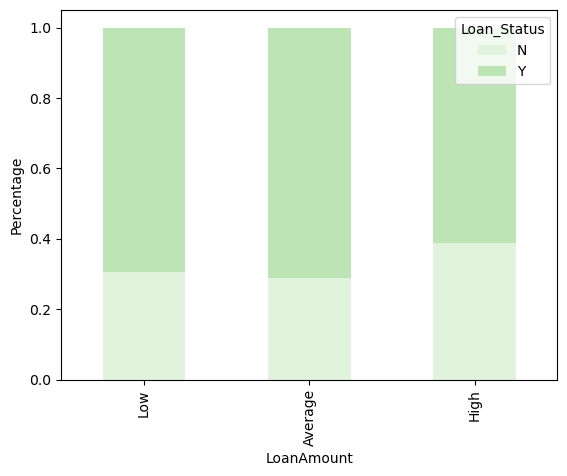

In [746]:
bins = [0, 100, 200, 700]
group = ["Low", "Average", "High"]
to_train["LoanAmount_bin"] = pd.cut(to_train["LoanAmount"], bins, labels=group)

LoanAmount_bin = pd.crosstab(to_train["LoanAmount_bin"], to_train["Loan_Status"])

plt.figure(figsize=(8, 6))

# Normalize the counts to create stacked percentages
normalized_loan_amount = LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0)

# Plot the stacked bar chart using seaborn with added color
normalized_loan_amount.plot(kind="bar", stacked=True, color=sns.color_palette("Greens"))

plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

Change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable's categories into 0 and 1

In [747]:
to_train["Dependents"].replace("3+", 3,inplace=True)
to_test["Dependents"].replace("3+", 3,inplace=True)

Convert the target variable "Loan Status" categories into 0 and 1 for Logistic Regression

In [748]:
to_train["Loan_Status"].replace("N", 0,inplace=True)
to_train["Loan_Status"].replace("Y", 1,inplace=True)

## Correlation Using HeatMaps

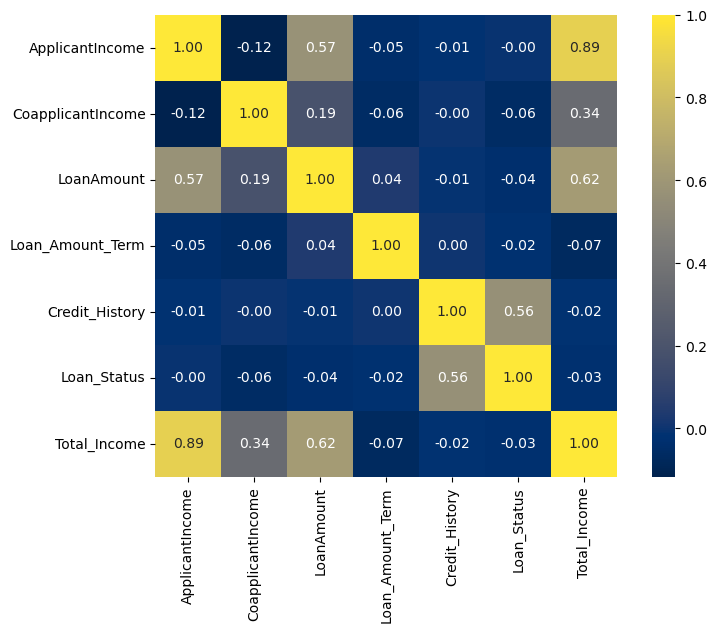

In [749]:
numeric_columns = to_train.select_dtypes(include=[np.number])
matrix = numeric_columns.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(matrix, square=True, cmap="cividis", annot=True, fmt='.2f')
plt.show()

In [750]:
columns_to_drop = ["Income_bin", "Coapplicant_Income_bin", "LoanAmount_bin", "Total_Income_bin", "Total_Income"]

# Check if the columns exist in the DataFrame before dropping
existing_columns = set(to_train.columns)
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop the columns if they exist
to_train = to_train.drop(columns=columns_to_drop, axis=1)


In [751]:
to_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


# Handling the Missing Data

Checking the number of null values

In [752]:
to_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit-history. So replacing the null values with the mode of the respective columns so that the values does not affect the result.

In [753]:
to_train["Gender"].fillna(to_train["Gender"].mode()[0],inplace=True)

In [754]:
to_train["Married"].fillna(to_train["Married"].mode()[0],inplace=True)

In [755]:
to_train["Dependents"].fillna(to_train["Dependents"].mode()[0],inplace=True)

In [756]:
to_train["Self_Employed"].fillna(to_train["Self_Employed"].mode()[0],inplace=True)

In [757]:
to_train["Credit_History"].fillna(to_train["Credit_History"].mode()[0],inplace=True)

In [758]:
to_train["Loan_Amount_Term"].fillna(to_train["Loan_Amount_Term"].mode()[0],inplace=True)

In [759]:
to_train["LoanAmount"].fillna(to_train["LoanAmount"].median(),inplace=True)

In [760]:
to_test["Gender"].fillna(to_test["Gender"].mode()[0],inplace=True)

In [761]:
to_test["Married"].fillna(to_test["Married"].mode()[0],inplace=True)

In [762]:
to_test['Dependents'].fillna(to_test['Dependents'].mode()[0],inplace=True)

In [763]:
to_test['Self_Employed'].fillna(to_test['Self_Employed'].mode()[0],inplace=True)

In [764]:
to_test['Credit_History'].fillna(to_test['Credit_History'].mode()[0],inplace=True)

In [765]:
to_test['Loan_Amount_Term'].fillna(to_test['Loan_Amount_Term'].mode()[0],inplace=True)

In [766]:
to_test['LoanAmount'].fillna(to_test['LoanAmount'].median(),inplace=True)

# Outlier Treatment

There are many outliers in the LoanAmount. Performing the Log transformation to make the distribution look normal

<Axes: >

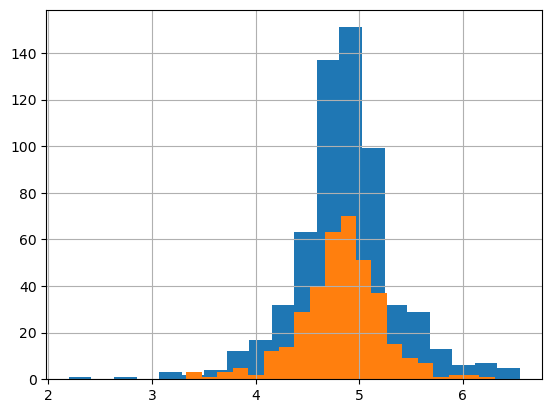

In [767]:
to_train["LoanAmount_log"] = np.log(to_train["LoanAmount"])
to_train["LoanAmount_log"].hist(bins=20)

to_test["LoanAmount_log"] = np.log(to_test["LoanAmount"])
to_test["LoanAmount_log"].hist(bins=20)

# Model Building

Loan_ID will not be used for futher analysis. Hence, dropping the Loan_ID Column

In [768]:
to_train=to_train.drop("Loan_ID",axis=1)
to_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [769]:
to_test=to_test.drop("Loan_ID",axis=1)
to_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709


In [770]:
to_train=to_train.drop("Gender",axis=1)
to_test=to_test.drop("Gender",axis=1)

In [771]:
to_train=to_train.drop("Dependents",axis=1)
to_test=to_test.drop("Dependents",axis=1)

In [772]:
to_train=to_train.drop("Self_Employed",axis=1)
to_test=to_test.drop("Self_Employed",axis=1)

Also Dropping the Loan_Status column and storing it in another variable.

In [773]:
x=to_train.drop("Loan_Status",axis=1)
x.head()

,Married,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,No,Graduate,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Yes,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Yes,Graduate,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Yes,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,No,Graduate,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [774]:
y=to_train["Loan_Status"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Creating Dummy Variable

In [775]:
x=pd.get_dummies(x)
to_train=pd.get_dummies(to_train)
to_test=pd.get_dummies(to_test)

In [776]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,4.852030,False,True,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,4.189655,False,True,True,False,False,False,True
3,2583,2358.0,120.0,360.0,1.0,4.787492,False,True,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,4.948760,True,False,True,False,False,False,True


# Applying Logistic Regression

In [777]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, train_size = 0.75,random_state=0)

In [778]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [779]:
pred_cv = model.predict(x_cv)

In [780]:
accuracy_score(y_cv, pred_cv)

0.8376623376623377

In [781]:
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_cv, pred_cv)
c

array([[ 20,  23],
       [  2, 109]])

In [782]:
to_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,False,True,True,False,False,False,True
1,3076,1500,126.0,360.0,1.0,4.836282,False,True,True,False,False,False,True
2,5000,1800,208.0,360.0,1.0,5.337538,False,True,True,False,False,False,True
3,2340,2546,100.0,360.0,1.0,4.605170,False,True,True,False,False,False,True
4,3276,0,78.0,360.0,1.0,4.356709,True,False,False,True,False,False,True


In [783]:
pred_test = model.predict(to_test)

In [784]:
submission=pd.read_csv("sample_submission.csv",header=0)

In [785]:
submission["Loan_Status"]=pred_test
submission["Loan_ID"]=training_original["Loan_ID"]

In [786]:
submission.head()

,Loan_ID,Loan_Status
0,LP001002,1
1,LP001003,1
2,LP001005,1
3,LP001006,1
4,LP001008,1


In [787]:
submission["Loan_Status"].replace(0, "N",inplace=True)
submission["Loan_Status"].replace(0, "Y",inplace=True)

In [788]:
pd.DataFrame(submission, columns=["Loan_ID","Loan_Status"]).to_csv("logistic.csv")

In [789]:
submission

,Loan_ID,Loan_Status
0,LP001002,1
1,LP001003,1
2,LP001005,1
3,LP001006,1
4,LP001008,1
...,...,...
362,LP002175,1
363,LP002178,1
364,LP002180,1
365,LP002181,1


# Applying Stratified K-means Clustering

In [790]:
from statistics import mean

In [791]:
from sklearn.model_selection import StratifiedKFold

In [792]:
i = 1
pred_scores=[]
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr, xvl = x.loc[train_index],x.loc[test_index]
    ytr, yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print("accuracy_score",score)
    i+=1
    pred_test = model.predict(to_test)
    pred=model.predict_proba(xvl)[:,1]
    pred_scores.append(score)
print("\n Mean of Accuracy Scores=",mean(pred_scores))


1 of kfold 5
accuracy_score 0.7967479674796748

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8130081300813008

5 of kfold 5
accuracy_score 0.7950819672131147

 Mean of Accuracy Scores= 0.807796881247501


# Decision Tree Algorithm

In [793]:
from sklearn import tree

In [794]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index, test_index in kf.split(x,y):
    print("\n {} of kfold {}".format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print("accuracy_score",score)
    i+=1
pred_test = model.predict(to_test)


 1 of kfold 5
accuracy_score 0.6585365853658537

 2 of kfold 5
accuracy_score 0.7154471544715447

 3 of kfold 5
accuracy_score 0.7235772357723578

 4 of kfold 5
accuracy_score 0.7154471544715447

 5 of kfold 5
accuracy_score 0.6475409836065574


In [795]:
submission["Loan_Status"]=pred_test
submission["Loan_ID"]=testing_original["Loan_ID"]
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,1


In [796]:
submission["Loan_Status"].replace(0, "N",inplace=True)
submission["Loan_Status"].replace(1, "Y",inplace=True)

pd.DataFrame(submission, columns=["Loan_ID","Loan_Status"]).to_csv("Decision Tree.csv")

##End